In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense
import keras

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_pickle("./data/rolling_averages_with_opponent.pkl")
df = df.dropna()
df = df.drop_duplicates(subset=["GAME_ID"], keep="first")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9389 entries, 34 to 19036
Columns: 180 entries, GAME_ID to PLUS_MINUS
dtypes: float64(174), int64(2), object(4)
memory usage: 13.0+ MB


In [3]:
df.describe()

,TEAM_ID,FGM_AVG,FGA_AVG,FG_PCT_AVG,FG3M_AVG,FG3A_AVG,FG3_PCT_AVG,FTM_AVG,FTA_AVG,FT_PCT_AVG,OREB_AVG,DREB_AVG,REB_AVG,AST_AVG,STL_AVG,BLK_AVG,TO_AVG,PF_AVG,PTS_AVG,E_OFF_RATING_AVG,OFF_RATING_AVG,E_DEF_RATING_AVG,DEF_RATING_AVG,E_NET_RATING_AVG,NET_RATING_AVG,AST_PCT_AVG,AST_TOV_AVG,AST_RATIO_AVG,OREB_PCT_AVG,DREB_PCT_AVG,REB_PCT_AVG,E_TM_TOV_PCT_AVG,TM_TOV_PCT_AVG,EFG_PCT_AVG,TS_PCT_AVG,E_USG_PCT_AVG,E_PACE_AVG,PACE_AVG,PACE_PER40_AVG,POSS_AVG,PIE_AVG,FTA_RATE_AVG,OPP_EFG_PCT_AVG,OPP_FTA_RATE_AVG,OPP_TOV_PCT_AVG,OPP_OREB_PCT_AVG,PTS_OFF_TOV_AVG,PTS_2ND_CHANCE_AVG,PTS_FB_AVG,PTS_PAINT_AVG,OPP_PTS_OFF_TOV_AVG,OPP_PTS_2ND_CHANCE_AVG,OPP_PTS_FB_AVG,OPP_PTS_PAINT_AVG,BLKA_AVG,PFD_AVG,PCT_FGA_2PT_AVG,PCT_FGA_3PT_AVG,PCT_PTS_2PT_AVG,PCT_PTS_2PT_MR_AVG,PCT_PTS_3PT_AVG,PCT_PTS_FB_AVG,PCT_PTS_FT_AVG,PCT_PTS_OFF_TOV_AVG,PCT_PTS_PAINT_AVG,PCT_AST_2PM_AVG,PCT_UAST_2PM_AVG,PCT_AST_3PM_AVG,PCT_UAST_3PM_AVG,PCT_AST_FGM_AVG,PCT_UAST_FGM_AVG,DIST_AVG,ORBC_AVG,DRBC_AVG,RBC_AVG,TCHS_AVG,SAST_AVG,FTAST_AVG,PASS_AVG,CFGM_AVG,CFGA_AVG,CFG_PCT_AVG,UFGM_AVG,UFGA_AVG,UFG_PCT_AVG,DFGM_AVG,DFGA_AVG,DFG_PCT_AVG,FGM_OPP_AVG,FGA_OPP_AVG,FG_PCT_OPP_AVG,FG3M_OPP_AVG,FG3A_OPP_AVG,FG3_PCT_OPP_AVG,FTM_OPP_AVG,FTA_OPP_AVG,FT_PCT_OPP_AVG,OREB_OPP_AVG,DREB_OPP_AVG,REB_OPP_AVG,AST_OPP_AVG,STL_OPP_AVG,BLK_OPP_AVG,TO_OPP_AVG,PF_OPP_AVG,PTS_OPP_AVG,E_OFF_RATING_OPP_AVG,OFF_RATING_OPP_AVG,E_DEF_RATING_OPP_AVG,DEF_RATING_OPP_AVG,E_NET_RATING_OPP_AVG,NET_RATING_OPP_AVG,AST_PCT_OPP_AVG,AST_TOV_OPP_AVG,AST_RATIO_OPP_AVG,OREB_PCT_OPP_AVG,DREB_PCT_OPP_AVG,REB_PCT_OPP_AVG,E_TM_TOV_PCT_OPP_AVG,TM_TOV_PCT_OPP_AVG,EFG_PCT_OPP_AVG,TS_PCT_OPP_AVG,E_USG_PCT_OPP_AVG,E_PACE_OPP_AVG,PACE_OPP_AVG,PACE_PER40_OPP_AVG,POSS_OPP_AVG,PIE_OPP_AVG,FTA_RATE_OPP_AVG,OPP_EFG_PCT_OPP_AVG,OPP_FTA_RATE_OPP_AVG,OPP_TOV_PCT_OPP_AVG,OPP_OREB_PCT_OPP_AVG,PTS_OFF_TOV_OPP_AVG,PTS_2ND_CHANCE_OPP_AVG,PTS_FB_OPP_AVG,PTS_PAINT_OPP_AVG,OPP_PTS_OFF_TOV_OPP_AVG,OPP_PTS_2ND_CHANCE_OPP_AVG,OPP_PTS_FB_OPP_AVG,OPP_PTS_PAINT_OPP_AVG,BLKA_OPP_AVG,PFD_OPP_AVG,PCT_FGA_2PT_OPP_AVG,PCT_FGA_3PT_OPP_AVG,PCT_PTS_2PT_OPP_AVG,PCT_PTS_2PT_MR_OPP_AVG,PCT_PTS_3PT_OPP_AVG,PCT_PTS_FB_OPP_AVG,PCT_PTS_FT_OPP_AVG,PCT_PTS_OFF_TOV_OPP_AVG,PCT_PTS_PAINT_OPP_AVG,PCT_AST_2PM_OPP_AVG,PCT_UAST_2PM_OPP_AVG,PCT_AST_3PM_OPP_AVG,PCT_UAST_3PM_OPP_AVG,PCT_AST_FGM_OPP_AVG,PCT_UAST_FGM_OPP_AVG,DIST_OPP_AVG,ORBC_OPP_AVG,DRBC_OPP_AVG,RBC_OPP_AVG,TCHS_OPP_AVG,SAST_OPP_AVG,FTAST_OPP_AVG,PASS_OPP_AVG,CFGM_OPP_AVG,CFGA_OPP_AVG,CFG_PCT_OPP_AVG,UFGM_OPP_AVG,UFGA_OPP_AVG,UFG_PCT_OPP_AVG,DFGM_OPP_AVG,DFGA_OPP_AVG,DFG_PCT_OPP_AVG,PLUS_MINUS
count,9.389000e+03,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000

In [4]:
df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,FGM_AVG,FGA_AVG,FG_PCT_AVG,FG3M_AVG,FG3A_AVG,FG3_PCT_AVG,FTM_AVG,FTA_AVG,FT_PCT_AVG,OREB_AVG,DREB_AVG,REB_AVG,AST_AVG,STL_AVG,BLK_AVG,TO_AVG,PF_AVG,PTS_AVG,E_OFF_RATING_AVG,OFF_RATING_AVG,E_DEF_RATING_AVG,DEF_RATING_AVG,E_NET_RATING_AVG,NET_RATING_AVG,AST_PCT_AVG,AST_TOV_AVG,AST_RATIO_AVG,OREB_PCT_AVG,DREB_PCT_AVG,REB_PCT_AVG,E_TM_TOV_PCT_AVG,TM_TOV_PCT_AVG,EFG_PCT_AVG,TS_PCT_AVG,E_USG_PCT_AVG,E_PACE_AVG,PACE_AVG,PACE_PER40_AVG,POSS_AVG,PIE_AVG,FTA_RATE_AVG,OPP_EFG_PCT_AVG,OPP_FTA_RATE_AVG,OPP_TOV_PCT_AVG,OPP_OREB_PCT_AVG,PTS_OFF_TOV_AVG,PTS_2ND_CHANCE_AVG,PTS_FB_AVG,PTS_PAINT_AVG,OPP_PTS_OFF_TOV_AVG,OPP_PTS_2ND_CHANCE_AVG,OPP_PTS_FB_AVG,OPP_PTS_PAINT_AVG,BLKA_AVG,PFD_AVG,PCT_FGA_2PT_AVG,PCT_FGA_3PT_AVG,PCT_PTS_2PT_AVG,PCT_PTS_2PT_MR_AVG,PCT_PTS_3PT_AVG,PCT_PTS_FB_AVG,PCT_PTS_FT_AVG,PCT_PTS_OFF_TOV_AVG,PCT_PTS_PAINT_AVG,PCT_AST_2PM_AVG,PCT_UAST_2PM_AVG,PCT_AST_3PM_AVG,PCT_UAST_3PM_AVG,PCT_AST_FGM_AVG,PCT_UAST_FGM_AVG,DIST_AVG,ORBC_AVG,DRBC_AVG,RBC_AVG,TCHS_AVG,SAST_AVG,FTAST_AVG,PASS_AVG,CFGM_AVG,CFGA_AVG,CFG_PCT_AVG,UFGM_AVG,UFGA_AVG,UFG_PCT_AVG,DFGM_AVG,DFGA_AVG,DFG_PCT_AVG,OPP_TEAM_ID,OPP_TEAM_ABBREVIATION,FGM_OPP_AVG,FGA_OPP_AVG,FG_PCT_OPP_AVG,FG3M_OPP_AVG,FG3A_OPP_AVG,FG3_PCT_OPP_AVG,FTM_OPP_AVG,FTA_OPP_AVG,FT_PCT_OPP_AVG,OREB_OPP_AVG,DREB_OPP_AVG,REB_OPP_AVG,AST_OPP_AVG,STL_OPP_AVG,BLK_OPP_AVG,TO_OPP_AVG,PF_OPP_AVG,PTS_OPP_AVG,E_OFF_RATING_OPP_AVG,OFF_RATING_OPP_AVG,E_DEF_RATING_OPP_AVG,DEF_RATING_OPP_AVG,E_NET_RATING_OPP_AVG,NET_RATING_OPP_AVG,AST_PCT_OPP_AVG,AST_TOV_OPP_AVG,AST_RATIO_OPP_AVG,OREB_PCT_OPP_AVG,DREB_PCT_OPP_AVG,REB_PCT_OPP_AVG,E_TM_TOV_PCT_OPP_AVG,TM_TOV_PCT_OPP_AVG,EFG_PCT_OPP_AVG,TS_PCT_OPP_AVG,E_USG_PCT_OPP_AVG,E_PACE_OPP_AVG,PACE_OPP_AVG,PACE_PER40_OPP_AVG,POSS_OPP_AVG,PIE_OPP_AVG,FTA_RATE_OPP_AVG,OPP_EFG_PCT_OPP_AVG,OPP_FTA_RATE_OPP_AVG,OPP_TOV_PCT_OPP_AVG,OPP_OREB_PCT_OPP_AVG,PTS_OFF_TOV_OPP_AVG,PTS_2ND_CHANCE_OPP_AVG,PTS_FB_OPP_AVG,PTS_PAINT_OPP_AVG,OPP_PTS_OFF_TOV_OPP_AVG,OPP_PTS_2ND_CHANCE_OPP_AVG,OPP_PTS_FB_OPP_AVG,OPP_PTS_PAINT_OPP_AVG,BLKA_OPP_AVG,PFD_OPP_AVG,PCT_FGA_2PT_OPP_AVG,PCT_FGA_3PT_OPP_AVG,PCT_PTS_2PT_OPP_AVG,PCT_PTS_2PT_MR_OPP_AVG,PCT_PTS_3PT_OPP_AVG,PCT_PTS_FB_OPP_AVG,PCT_PTS_FT_OPP_AVG,PCT_PTS_OFF_TOV_OPP_AVG,PCT_PTS_PAINT_OPP_AVG,PCT_AST_2PM_OPP_AVG,PCT_UAST_2PM_OPP_AVG,PCT_AST_3PM_OPP_AVG,PCT_UAST_3PM_OPP_AVG,PCT_AST_FGM_OPP_AVG,PCT_UAST_FGM_OPP_AVG,DIST_OPP_AVG,ORBC_OPP_AVG,DRBC_OPP_AVG,RBC_OPP_AVG,TCHS_OPP_AVG,SAST_OPP_AVG,FTAST_OPP_AVG,PASS_OPP_AVG,CFGM_OPP_AVG,CFGA_OPP_AVG,CFG_PCT_OPP_AVG,UFGM_OPP_AVG,UFGA_OPP_AVG,UFG_PCT_OPP_AVG,DFGM_OPP_AVG,DFGA_OPP_AVG,DFG_PCT_OPP_AVG,PLUS_MINUS
34,0021500018,1610612754,IND,32.0,86.0,0.372,9.0,23.0,0.391,26.0,31.0,0.839,8.0,32.0,40.0,23.0,14.0,3.0,13.0,30.0,99.0,94.6,95.2,97.1,101.9,-2.5,-6.7,0.719,1.77,17.0,0.193,0.700,0.430,12.424,12.5,0.424,0.497,0.201,106.90,104.0,86.67,104.0,0.477,0.360,0.494,0.488,0.192,0.300,18.0,10.0,20.0,36.0,12.0,22.0,9.0,46.0,2.0,24.0,0.733,0.267,0.465,0.101,0.273,0.202,0.263,0.182,0.364,0.609,0.391,1.000,0.000,0.719,0.281,16.82,41.0,73.0,108.0,421.0,2.0,0.0,295.0,22.0,51.0,0.431,14.0,29.0,0.483,14.0,20.0,0.700,1610612763,MEM,29.0,82.0,0.354,2.0,16.0,0.125,16.0,22.0,0.7270,11.0,29.0,40.0,15.0,8.0,3.0,16.0,18.0,76.0,78.6,78.40,107.60,108.2,-29.00,-29.8,0.5170,0.940,12.2,0.2140,0.6810,0.427,16.5490,16.5,0.3660,0.4140,0.201,97.58,97.50,81.25,97.0,0.3000,0.2680,0.565,0.202,0.1930,0.3190,12.0,7.0,8.0,36.0,23.0,14.0,26.0,48.0,2.0,25.0,0.805,0.195,0.7110,0.2370,0.079,0.105,0.2110,0.1580,0.4740,0.481,0.519,1.0000,0.0000,0.5170,0.4830,16.650,32.0,65.0,94.0,420.0,6.0,1.0,303.0,18.0,31.0,0.581,23.0,53.0,0.434,11.0,18.0,0.611,-9
36,0021500019,1610612752,NYK,42.0,93.0,0.452,9.0,23.0,0.391,29.0,35.0,0.829,19.0,30.0,49.0,24.0,11.0,7.0,11.0,28.0,122.0,121.5,124.5,97.4,98.0,24.2,26.5,0.571,2.18,16.7,0.389,0.614,0.505,10.956,11.2,0.500,0.563,0.198,100.02,98.5,82.08,98.0,0.646,0.376,0.401,0.360,0.181,0.386,25.0,17.0,19.0,50.0,14.0,23.0,8.0,38.0,4.0,27.0,0.753,0.247,0.541,0.131,0.221,0.156,0.238,0

# Modeling on scaled data

In [5]:
cols = df.drop(columns=["GAME_ID","TEAM_ID","TEAM_ABBREVIATION","OPP_TEAM_ID","OPP_TEAM_ABBREVIATION","PLUS_MINUS"]).columns
target = "PLUS_MINUS"
X = df[cols]
y = df[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
X_train

,FGM_AVG,FGA_AVG,FG_PCT_AVG,FG3M_AVG,FG3A_AVG,FG3_PCT_AVG,FTM_AVG,FTA_AVG,FT_PCT_AVG,OREB_AVG,DREB_AVG,REB_AVG,AST_AVG,STL_AVG,BLK_AVG,TO_AVG,PF_AVG,PTS_AVG,E_OFF_RATING_AVG,OFF_RATING_AVG,E_DEF_RATING_AVG,DEF_RATING_AVG,E_NET_RATING_AVG,NET_RATING_AVG,AST_PCT_AVG,AST_TOV_AVG,AST_RATIO_AVG,OREB_PCT_AVG,DREB_PCT_AVG,REB_PCT_AVG,E_TM_TOV_PCT_AVG,TM_TOV_PCT_AVG,EFG_PCT_AVG,TS_PCT_AVG,E_USG_PCT_AVG,E_PACE_AVG,PACE_AVG,PACE_PER40_AVG,POSS_AVG,PIE_AVG,FTA_RATE_AVG,OPP_EFG_PCT_AVG,OPP_FTA_RATE_AVG,OPP_TOV_PCT_AVG,OPP_OREB_PCT_AVG,PTS_OFF_TOV_AVG,PTS_2ND_CHANCE_AVG,PTS_FB_AVG,PTS_PAINT_AVG,OPP_PTS_OFF_TOV_AVG,OPP_PTS_2ND_CHANCE_AVG,OPP_PTS_FB_AVG,OPP_PTS_PAINT_AVG,BLKA_AVG,PFD_AVG,PCT_FGA_2PT_AVG,PCT_FGA_3PT_AVG,PCT_PTS_2PT_AVG,PCT_PTS_2PT_MR_AVG,PCT_PTS_3PT_AVG,PCT_PTS_FB_AVG,PCT_PTS_FT_AVG,PCT_PTS_OFF_TOV_AVG,PCT_PTS_PAINT_AVG,PCT_AST_2PM_AVG,PCT_UAST_2PM_AVG,PCT_AST_3PM_AVG,PCT_UAST_3PM_AVG,PCT_AST_FGM_AVG,PCT_UAST_FGM_AVG,DIST_AVG,ORBC_AVG,DRBC_AVG,RBC_AVG,TCHS_AVG,SAST_AVG,FTAST_AVG,PASS_AVG,CFGM_AVG,CFGA_AVG,CFG_PCT_AVG,UFGM_AVG,UFGA_AVG,UFG_PCT_AVG,DFGM_AVG,DFGA_AVG,DFG_PCT_AVG,FGM_OPP_AVG,FGA_OPP_AVG,FG_PCT_OPP_AVG,FG3M_OPP_AVG,FG3A_OPP_AVG,FG3_PCT_OPP_AVG,FTM_OPP_AVG,FTA_OPP_AVG,FT_PCT_OPP_AVG,OREB_OPP_AVG,DREB_OPP_AVG,REB_OPP_AVG,AST_OPP_AVG,STL_OPP_AVG,BLK_OPP_AVG,TO_OPP_AVG,PF_OPP_AVG,PTS_OPP_AVG,E_OFF_RATING_OPP_AVG,OFF_RATING_OPP_AVG,E_DEF_RATING_OPP_AVG,DEF_RATING_OPP_AVG,E_NET_RATING_OPP_AVG,NET_RATING_OPP_AVG,AST_PCT_OPP_AVG,AST_TOV_OPP_AVG,AST_RATIO_OPP_AVG,OREB_PCT_OPP_AVG,DREB_PCT_OPP_AVG,REB_PCT_OPP_AVG,E_TM_TOV_PCT_OPP_AVG,TM_TOV_PCT_OPP_AVG,EFG_PCT_OPP_AVG,TS_PCT_OPP_AVG,E_USG_PCT_OPP_AVG,E_PACE_OPP_AVG,PACE_OPP_AVG,PACE_PER40_OPP_AVG,POSS_OPP_AVG,PIE_OPP_AVG,FTA_RATE_OPP_AVG,OPP_EFG_PCT_OPP_AVG,OPP_FTA_RATE_OPP_AVG,OPP_TOV_PCT_OPP_AVG,OPP_OREB_PCT_OPP_AVG,PTS_OFF_TOV_OPP_AVG,PTS_2ND_CHANCE_OPP_AVG,PTS_FB_OPP_AVG,PTS_PAINT_OPP_AVG,OPP_PTS_OFF_TOV_OPP_AVG,OPP_PTS_2ND_CHANCE_OPP_AVG,OPP_PTS_FB_OPP_AVG,OPP_PTS_PAINT_OPP_AVG,BLKA_OPP_AVG,PFD_OPP_AVG,PCT_FGA_2PT_OPP_AVG,PCT_FGA_3PT_OPP_AVG,PCT_PTS_2PT_OPP_AVG,PCT_PTS_2PT_MR_OPP_AVG,PCT_PTS_3PT_OPP_AVG,PCT_PTS_FB_OPP_AVG,PCT_PTS_FT_OPP_AVG,PCT_PTS_OFF_TOV_OPP_AVG,PCT_PTS_PAINT_OPP_AVG,PCT_AST_2PM_OPP_AVG,PCT_UAST_2PM_OPP_AVG,PCT_AST_3PM_OPP_AVG,PCT_UAST_3PM_OPP_AVG,PCT_AST_FGM_OPP_AVG,PCT_UAST_FGM_OPP_AVG,DIST_OPP_AVG,ORBC_OPP_AVG,DRBC_OPP_AVG,RBC_OPP_AVG,TCHS_OPP_AVG,SAST_OPP_AVG,FTAST_OPP_AVG,PASS_OPP_AVG,CFGM_OPP_AVG,CFGA_OPP_AVG,CFG_PCT_OPP_AVG,UFGM_OPP_AVG,UFGA_OPP_AVG,UFG_PCT_OPP_AVG,DFGM_OPP_AVG,DFGA_OPP_AVG,DFG_PCT_OPP_AVG
10302,41.571429,91.000000,0.457071,10.428571,30.571429,0.341071,15.428571,20.000000,0.767286,9.857143,35.285714,45.142857,26.857143,7.642857,5.500000,16.571429,23.000000,109.000000,102.121429,103.500000,109.464286,112.292857,-7.328571,-8.757143,0.646643,1.708571,18.671429,0.255643,0.727357,0.491500,15.813786,16.085714,0.514714,0.546571,0.199429,106.758571,104.604286,87.171429,105.285714,0.458143,0.220429,0.535357,0.291000,0.138714,0.272643,14.714286,12.571429,15.428571,53.714286,21.857143,15.214286,16.285714,49.428571,6.571429,20.142857,0.663643,0.336357,0.572500,0.076571,0.284429,0.143357,0.142929,0.138857,0.495857,0.569714,0.430286,0.858643,0.141429,0.646643,0.353357,18.242857,25.285714,58.571429,81.857143,425.000000,3.285714,1.928571,297.500000,18.357143,36.214286,0.509357,24.500000,54.928571,0.446071,15.642857,25.357143,0.615500,42.866667,89.266667,0.479133,10.600000,29.733333,0.356600,15.800000,20.933333,0.753467,10.266667,35.600000,45.866667,27.000000,8.266667,7.666667,14.733333,20.466667,112.133333,108.406667,110.620000,99.260000,102.226667,9.140000,8.386667,0.628533,1.867333,19.086667,0.285467,0.746600,0.516933,14.662267,14.966667,0.538667,0.568733,0.197467,102.824000,100.265333,83.554000,101.333333,0.560933,0.235867,0.495200,0.252667,0.162467,0.253400,18.733333,15.533333,15.533333,53.200000,16.933333,11.133333,16.333333,44.533333,3.400000,20.533333,0.666000,0.334000,0.576067,0.102133,0.283067,0.136600,0.140933,0.166200,0.473800,0.54

## Data scaling

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
opt = keras.optimizers.AdamW(learning_rate=0.0002)
NN_model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_absolute_error'])
NN_model.summary()

c:\Users\mibam\Documents\GitHub\predicting_nba_margin_of_victory\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        22,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,689 (385.50 KB)

 Trainable params: 98,689 (385.50 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
checkpoint_name = 'models/keras_checkpoint/Weights-{epoch:03d}--{val_loss:.5f}.keras' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [73]:
NN_model.fit(X_train_scaled, y_train, epochs=150, batch_size=64, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/150
91/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.5935 - mean_absolute_error: 11.5935
Epoch 1: val_loss improved from inf to 11.52276, saving model to keras_checkpoint/Weights-001--11.52276.keras
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 11.5898 - mean_absolute_error: 11.5898 - val_loss: 11.5228 - val_mean_absolute_error: 11.5228
Epoch 2/150
79/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.5934 - mean_absolute_error: 11.5934
Epoch 2: val_loss improved from 11.52276 to 11.52208, saving model to keras_checkpoint/Weights-002--11.52208.keras
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.5788 - mean_absolute_error: 11.5788 - val_loss: 11.5221 - val_mean_absolute_error: 11.5221
Epoch 3/150
87/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.3638 - mean_absolute_error: 11.3638
Epoch 3: val_loss improved from 11.52208 to 11.50714, saving model to keras_checkpoint/Weights-003--11.50714.keras
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.3764 - mean_absolute_error: 11.376

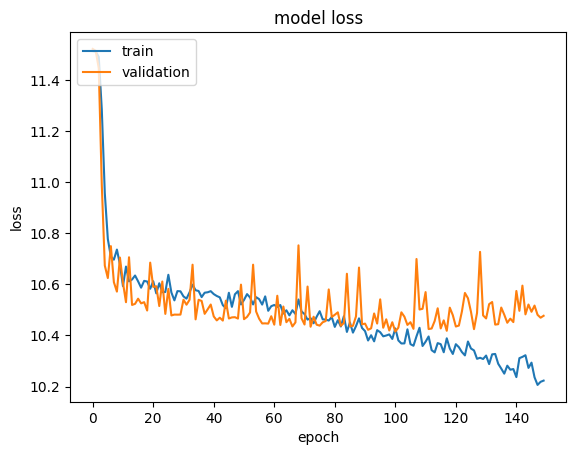

In [48]:
# plot the training and validation loss
plt.plot(NN_model.history.history['loss'])
plt.plot(NN_model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [13]:
# load best weights
NN_model.load_weights('models/keras_checkpoint/Weights-101--10.41522.keras')

# make predictions

predictions = NN_model.predict(X_test_scaled)
predictions = predictions.flatten()



59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [17]:
NN_model.save_weights('models/blackbox_models/nn_model_weights.weights.h5')

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(y_test, predictions))
print("R2 Score: ", r2_score(y_test, predictions))

Mean Absolute Error:  10.530839271801776
Mean Squared Error:  178.7370284251982
R2 Score:  0.1419144533041392


In [58]:
# add predictions to whole dataframe
df["NN_PREDICTION"] = NN_model.predict(scaler.transform(df[cols])).flatten()

294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step


In [59]:
df['WIN'] = df['PLUS_MINUS'] > 0
df['NN_WIN'] = df['NN_PREDICTION'] > 0


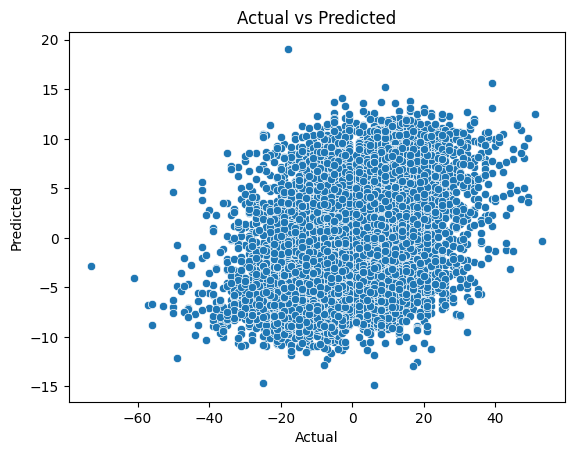

In [60]:
# plot the predictions
sns.scatterplot(x="PLUS_MINUS", y="NN_PREDICTION", data=df)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [62]:
# calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(df['WIN'], df['NN_WIN'])
print("Accuracy: ", acc)

Accuracy:  0.6385131536904889


In [63]:
# calculate mean percentage error
df['PERCENTAGE_ERROR'] = (df['PLUS_MINUS'] - df['NN_PREDICTION']) / df['PLUS_MINUS']
mean_percentage_error = df['PERCENTAGE_ERROR'].mean()
print("Mean Percentage Error: ", mean_percentage_error)

Mean Percentage Error:  0.8291742598085856


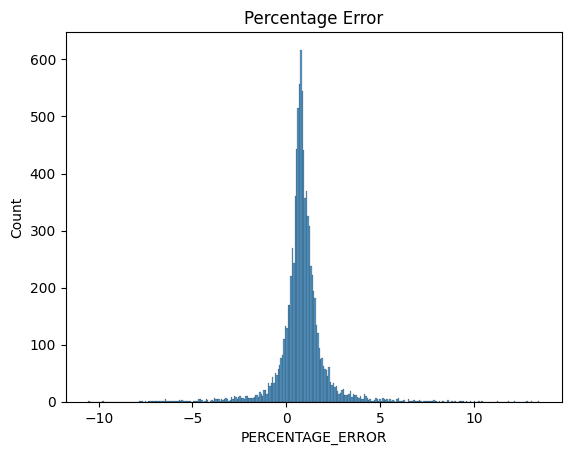

In [64]:
plot = sns.histplot(df['PERCENTAGE_ERROR'])
plot.set_title("Percentage Error")
plt.show()

In [65]:
# set game types
## if the plus minus is between -5 and 5, it is a clutch game
## if the plus minus is greater than 5, but less than 10, it is a close game
## if the plus minues is less than -5, but more than -10, it is a close game
## if the plus minus is greater than 10, it is a blowout
df['GAME_TYPE'] = "BLOWOUT"
df.loc[(df['PLUS_MINUS'] >= -5) & (df['PLUS_MINUS'] <= 5), 'GAME_TYPE'] = "CLUTCH"
df.loc[(df['PLUS_MINUS'] > 5) & (df['PLUS_MINUS'] < 10), 'GAME_TYPE'] = "CLOSE"
df.loc[(df['PLUS_MINUS'] < -5) & (df['PLUS_MINUS'] > -10), 'GAME_TYPE'] = "CLOSE"


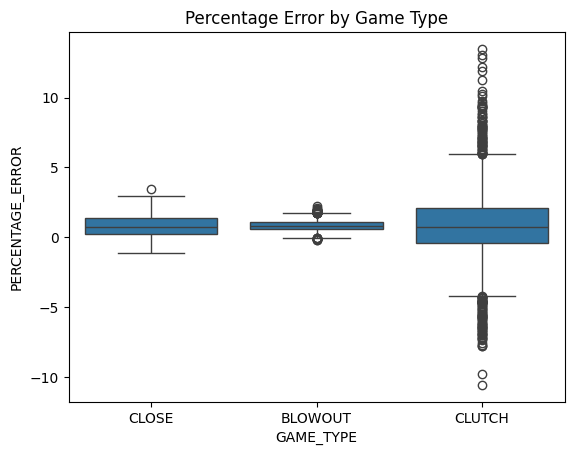

In [66]:
# plot the percentage error by game type
plot = sns.boxplot(x="GAME_TYPE", y="PERCENTAGE_ERROR", data=df)
plot.set_title("Percentage Error by Game Type")
plt.show()

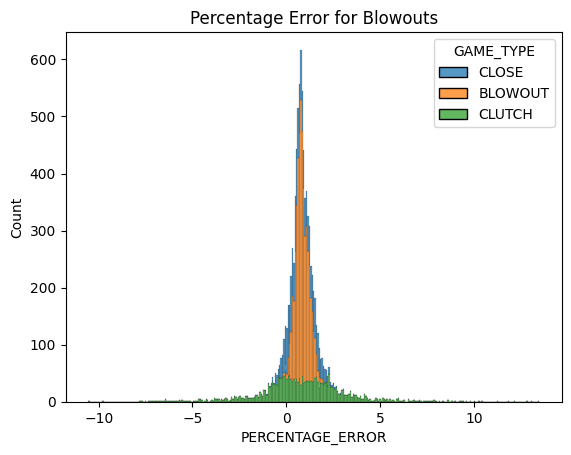

In [68]:
# hist plots of percentage error by game type
plot = sns.histplot(data=df, x="PERCENTAGE_ERROR", hue="GAME_TYPE", multiple="stack")
plot.set_title("Percentage Error for Blowouts")
plt.show()

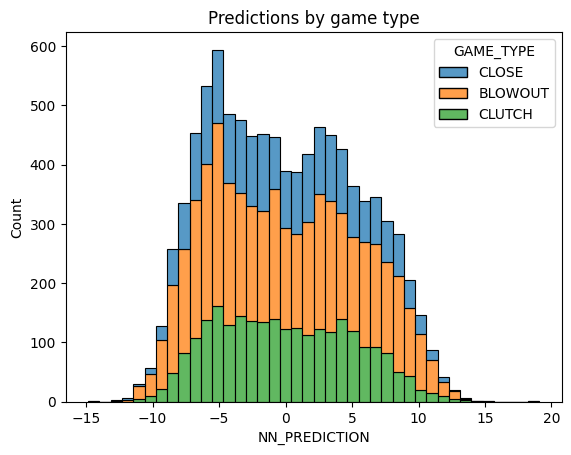

In [69]:
# hist plots of percentage error by game type
plot = sns.histplot(data=df, x="NN_PREDICTION", hue="GAME_TYPE", multiple="stack")
plot.set_title("Predictions by game type")
plt.show()

In [70]:
# calculate accuracy by game type
accuracy_by_game_type = df.groupby("GAME_TYPE").apply(lambda x: accuracy_score(x['WIN'], x['NN_WIN']))
print(accuracy_by_game_type)

GAME_TYPE
BLOWOUT    0.698761
CLOSE      0.617465
CLUTCH     0.547788
dtype: float64


C:\Users\mibam\AppData\Local\Temp\ipykernel_26232\3402753007.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_by_game_type = df.groupby("GAME_TYPE").apply(lambda x: accuracy_score(x['WIN'], x['NN_WIN']))


In [74]:
# save the data
df.to_pickle("./data/rolling_averages_with_opponent_and_predictions.pkl")